In [1]:
import os
import pandas as pd
import numpy as np
    # Librerías para el procesado de imagen
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image
from collections import defaultdict
from PIL import Image
import imageio
from mlxtend.image import extract_face_landmarks

Using TensorFlow backend.


In [2]:
path = '../input/'

In [3]:
df = pd.read_excel(path + 'CFD_2.0.3_Norming_Data_and_Codebook.xlsx', sheet_name='CFD 2.0.3 Norming Data')

In [4]:
df.head()

,Target,Race,Gender,Age,NumberofRaters,Female_prop,Male_prop,Asian_prop,Black_prop,Latino_prop,...,EyeShape,EyeSize,UpperHeadLength,MidfaceLength,ChinLength,ForeheadHeight,CheekboneHeight,CheekboneProminence,FaceRoundness,fWHR
0,AF-200,A,F,32.571429,28,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.404651,0.060924,0.414099,0.326797,0.130719,0.264706,0.388189,91.5,0.545752,1.921146
1,AF-201,A,F,23.666667,27,1.000000,0.000000,0.962963,0.000000,0.000000,...,0.329204,0.041892,0.414414,0.329279,0.144595,0.300901,0.383784,146.0,0.488288,1.901129
2,AF-202,A,F,24.448276,29,0.827586,0.172414,0.310345,0.068966,0.137931,...,0.357939,0.051586,0.411080,0.310317,0.173424,0.298475,0.397029,58.0,0.481333,1.888249
3,AF-203,A,F,22.758621,29,1.000000,0.000000,0.758621,0.000000,0.068966,...,0.443200,0.063913,0.354407,0.343793,0.169820,0.272266,0.421089,87.5,0.500231,1.863719
4,AF-204,A,F,30.137931,29,1.000000,0.000000,0.827586,0.000000,0.068966,...,0.432247,0.053435,0.438931,0.293045,0.180237,0.293893,0.371925,73.5,0.513571,1.935783


In [5]:
df_clean = df[['Target', 'Attractive']]
df_clean.head()

,Target,Attractive
0,AF-200,4.111111
1,AF-201,3.111111
2,AF-202,3.000000
3,AF-203,3.275862
4,AF-204,3.172414


In [6]:
print(df_clean.shape)

(597, 2)


In [7]:
all_images = defaultdict(list)
for filename, rating in df_clean.values:
    all_images[filename].append(rating)

In [8]:
ratings = {}
for filename, rating in all_images.items():
    ratings[filename] = np.mean(rating)

In [9]:
value = []
path2 = path + 'CFD-Version-2.0.3-Norming-Data/Images/'
path3 = path + 'CFD-Version-2.0.3-Norming-Data/Images_resized/'
for filename in os.listdir(path2):
    img_path = path2 + filename
    img = image.load_img(img_path).convert('L')
    img.thumbnail((210,210), Image.ANTIALIAS)
    img.save(path3 + filename, "JPEG")
    value.append(ratings[filename[:6]])
print(len(value))

597


In [10]:
images_array = []
landmarks = []
for filename in os.listdir(path3):
    img = imageio.imread(path3 + filename)
    landmark = extract_face_landmarks(img)
    #img = image.img_to_array(img)
    images_array.append(img)
    landmarks.append(landmark)

In [11]:
print(type(images_array))
#print(images_array)

<class 'list'>


In [12]:
images_array = np.array(images_array)
landmarks = np.array(landmarks)
print(type(images_array),type(landmarks))
print(images_array.shape, images_array[0].shape, landmarks.shape)
print('\nFirst 10 landmarks:\n', landmarks[0][:10])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(598,) (147, 210) (598, 68, 2)

First 10 landmarks:
 [[ 69  68]
 [ 70  77]
 [ 71  86]
 [ 73  95]
 [ 76 104]
 [ 81 112]
 [ 88 118]
 [ 96 123]
 [105 125]
 [115 123]]


Rating: 4.111111111


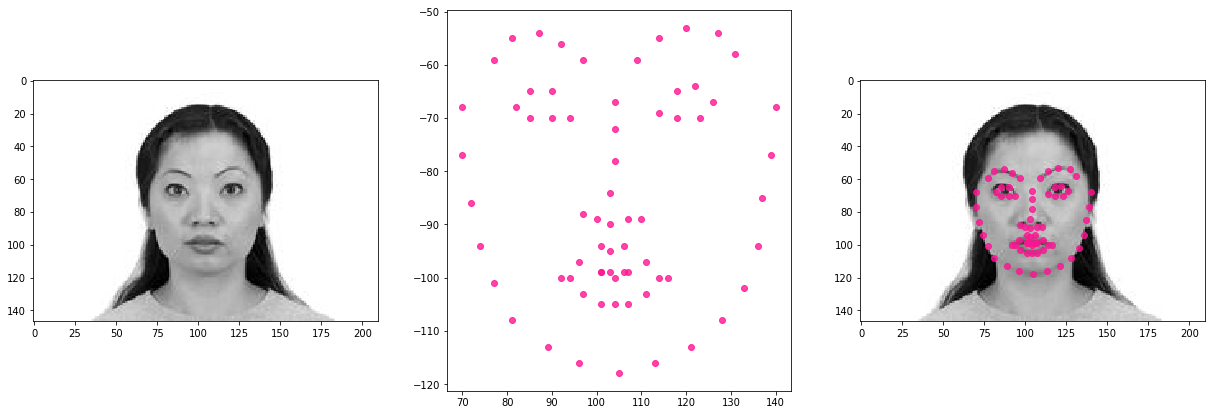

In [13]:
def plot_landmarks(img, landmarks, to_print=False, filename='example_landmarks.png'):
    fig = plt.figure(figsize=(21, 7))
    ax = fig.add_subplot(1, 3, 1)
    #img = np.reshape(img, (147,210))
    ax.imshow(img, cmap='gray')
    ax = fig.add_subplot(1, 3, 2)
    ax.scatter(landmarks[:, 0], -landmarks[:, 1], c='deeppink', alpha=0.8)
    ax = fig.add_subplot(1, 3, 3)
    img2 = img.copy()
    ax.imshow(img2, cmap='gray')
    ax.scatter(landmarks[:, 0], landmarks[:, 1], c='deeppink', alpha=0.8)
    if to_print: 
        fig.savefig('../images/' + filename)
    plt.show()
    
print('Rating: {}'.format(value[16]))
plot_landmarks(images_array[16], landmarks[16], to_print=True)

In [14]:
total_land = 68*2
landmarks_ = landmarks.reshape(598,total_land)

In [15]:
data_zipped = list(zip(images_array, value, landmarks_))
data = pd.DataFrame(data_zipped, columns=['Images','Rating', 'Landmarks'])
data.head()

,Images,Rating,Landmarks
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",3.821429,"[69, 68, 70, 77, 71, 86, 73, 95, 76, 104, 81, ..."
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",2.777778,"[68, 69, 69, 78, 70, 88, 72, 97, 74, 106, 79, ..."
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",3.280000,"[72, 67, 72, 76, 74, 85, 76, 94, 78, 102, 82, ..."
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",3.857143,"[68, 68, 70, 78, 72, 87, 74, 96, 77, 106, 82, ..."
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",3.000000,"[69, 69, 70, 78, 71, 86, 73, 94, 76, 102, 81, ..."


In [16]:
df_landmarks = data['Landmarks']
df_landmarks = pd.concat([df_landmarks.apply(pd.Series), df_landmarks], axis=1).drop(['Landmarks'], axis=1).head()
df_landmarks.columns = ["x_%d"%i if i%2==0 or i==0 else "y_%d"%(i-1) for i in range(136)]
df_landmarks.head()

,x_0,y_0,x_2,y_2,x_4,y_4,x_6,y_6,x_8,y_8,...,x_126,y_126,x_128,y_128,x_130,y_130,x_132,y_132,x_134,y_134
0,69,68,70,77,71,86,73,95,76,104,...,108,100,116,102,109,101,105,101,101,101
1,68,69,69,78,70,88,72,97,74,106,...,108,99,116,101,108,99,104,100,101,100
2,72,67,72,76,74,85,76,94,78,102,...,109,101,118,101,109,101,104,102,101,101
3,68,68,70,78,72,87,74,96,77,106,...,109,100,116,100,109,100,106,100,103,100
4,69,69,70,78,71,86,73,94,76,102,...,109,96,116,97,109,97,106,98,103,97


In [17]:
score = data['Rating']
def create_bins(data):
    bins = (0, 1.49, 2, 2.49, 3, 3.49, 4, 4.49, 5, 5.5)
    labels = ('1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5')
    groups = pd.cut(score, bins=bins, labels=labels)
    return groups

In [18]:
data['Ratings'] = create_bins(data)
data = data.drop(['Rating','Landmarks'], axis=1)
data.head()

,Images,Ratings
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",3.5
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",2.5
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",3
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",3.5
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",2.5


In [19]:
def save_csv(name, filename):
    name.to_csv('../src/' + filename, index=False)

In [20]:
save_csv(df_landmarks, filename='landmarks_cleaned.csv')

In [21]:
save_csv(data, filename='data_cleaned.csv')